Нахождение таблицы на изображении с помощью OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

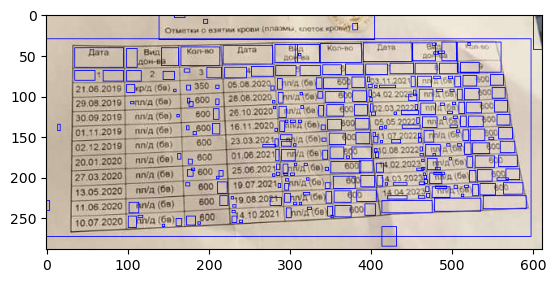

In [3]:
file = r'tablica2.jpg'
table_image_contour = cv2.imread(file, 0)
table_image = cv2.imread(file)

# улучшение изображения
ret, thresh_value = cv2.threshold(table_image_contour, 180, 255, cv2.THRESH_BINARY_INV)

# расширение изображения
kernel = np.ones((5,5), np.uint8)
dilated_value = cv2.dilate(thresh_value, kernel, iterations=1)

# поиск контуров
contours, hierarchy = cv2.findContours(dilated_value, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# определение координат контуров и размещение их на исходном изображении
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    # bounding the images
    if y < 350:
        table_image = cv2.rectangle(table_image, (x, y), (x + w, y + h), (0, 0, 255), 1)

# отображение результата
plt.imshow(table_image)
plt.show()
cv2.namedWindow('detecttable', cv2.WINDOW_NORMAL)